<a href="https://colab.research.google.com/github/allnes/age_classifier/blob/master/fcn_count/fcn_1200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
age_classifier	LICENSE.txt  rcv1.ipynb        summaries
checkpoints	makefile     README.md	       trials
lib		nips2016     requirements.txt  usage.ipynb
From https://github.com/allnes/cnn_graph
 * branch            graph_train -> FETCH_HEAD
Already up to date.
['arr_0', 'arr_1']
(729, 16384)
(729,)
--> Reshape data


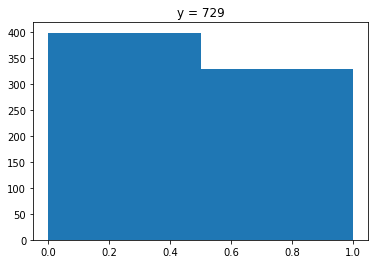

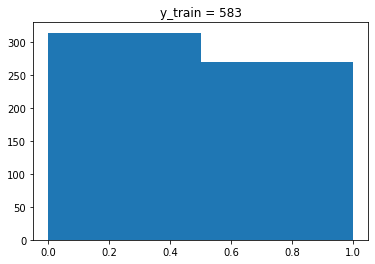

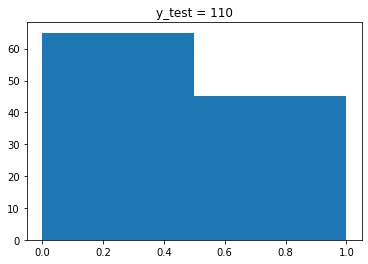

[0 1]
--> Get distance graph
d = |V| = 128, k|V| < |E| = 128440


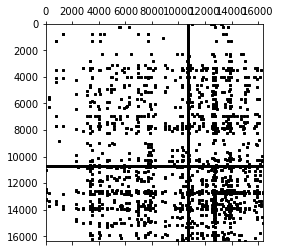

--> Get laplacian matrix


/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])


Layer 0: M_0 = |V| = 125608 nodes (109224 added),|E| = 64220 edges
Layer 1: M_1 = |V| = 62804 nodes (46631 added),|E| = 64181 edges
Layer 2: M_2 = |V| = 31402 nodes (15439 added),|E| = 63507 edges
Layer 3: M_3 = |V| = 15701 nodes (0 added),|E| = 62915 edges
(583, 125608)
(36, 125608)
(110, 125608)
NN architecture
  input: M_0 = 125608
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 125608 * 32 / 4 = 1004864
    weights: F_0 * F_1 * K_1 = 1 * 32 * 16 = 512
    biases: M_1 * F_1 = 125608 * 32 = 4019456
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 31402 * 32 / 2 = 502432
    weights: F_1 * F_2 * K_2 = 32 * 32 * 16 = 16384
    biases: M_2 * F_2 = 31402 * 32 = 1004864
  layer 3: fc1
    representation: M_3 = 1200
    weights: M_2 * M_3 = 502432 * 1200 = 602918400
    biases: M_3 = 1200
  layer 4: logits (softmax)
    representation: M_4 = 2
    weights: M_3 * M_4 = 1200 * 2 = 2400
    biases: M_4 = 2







Instructions for updating:
Please use `rate` instead of `keep_p

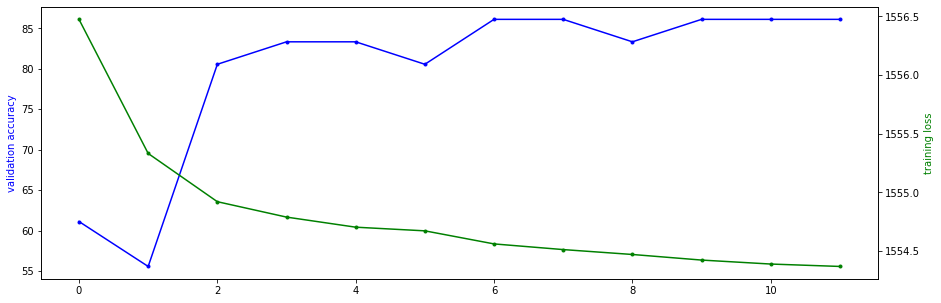

Time per step: 8374.68 ms
(110, 125608) (110,)
############ Class 0
(65, 125608)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 89.23 (58 / 65), f1 (weighted): 94.31, loss: 1.43e+03
time: 45s (wall 18s)
############ Class 1
(45, 125608)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 93.33 (42 / 45), f1 (weighted): 96.55, loss: 1.24e+03
time: 28s (wall 13s)
############ All
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 90.91 (100 / 110), f1 (weighted): 90.96, loss: 1.19e+03
time: 60s (wall 23s)


In [1]:
%tensorflow_version 1.x

from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/')
!ls

# !git clone https://github.com/mdeff/cnn_graph
# !git status
# !git fetch
# !git checkout graph_train
!git pull origin graph_train

# classes = { 2, 3, 4, 5, 6, 7, 9 }
%run age_classifier/age_classes_fcn \
  --path_project='/content/drive/My Drive/DL_DATA_GRAPH/' \
  --path_data='NEW/converted_data_resize_875_opencv_128.npz' \
  --zip_size=128 \
  --class_count=2 \
  --fcn_count=1200 \

%matplotlib inline